In [41]:
import pandas as pd
import numpy as np

# RandomForest

In [42]:
df = pd.read_csv("/Users/ivanpopov/Downloads/training_mush.csv")
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [43]:
X = df.drop('class', axis=1)
Y = df['class']

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
parametrs = {
    'n_estimators': range(10, 51, 10),
    'max_depth': range(1, 13, 2),
    'min_samples_leaf': range(1, 8),
    'min_samples_split': range(2, 10, 2)
}

In [46]:
clf_rf = RandomForestClassifier(random_state=0)

In [47]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)

In [48]:
grid_search_cv_clf.fit(X, Y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [49]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [50]:
best_clf_rf = grid_search_cv_clf.best_estimator_

In [51]:
best_clf_rf.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

<AxesSubplot:>

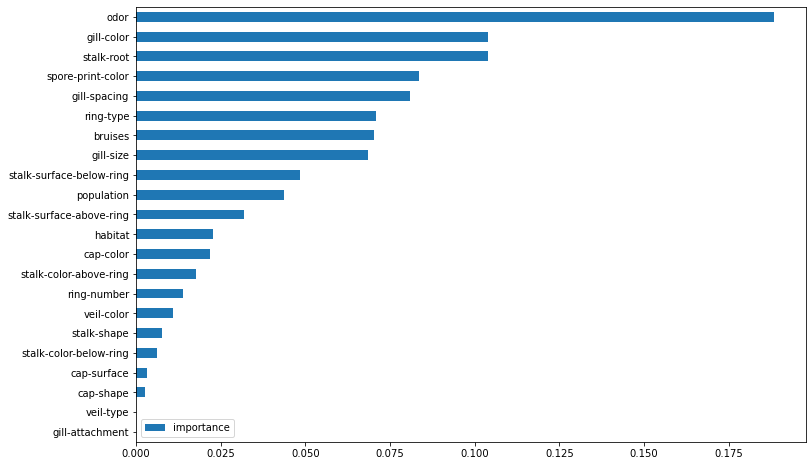

In [52]:
imp = pd.DataFrame(best_clf_rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [53]:
df = pd.read_csv("/Users/ivanpopov/Downloads/testing_mush.csv")
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [61]:
X_test = df
predictions = best_clf_rf.predict(X_test)

In [62]:
print('Количество съедобных грибов:', predictions.sum())

Количество съедобных грибов: 976


In [63]:
Y_test = pd.read_csv("/Users/ivanpopov/Downloads/testing_y_mush.csv")
Y_test.head()

,class
0,0
1,0
2,1
3,1
4,1


In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

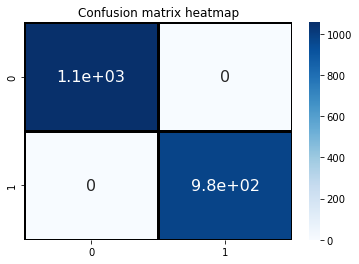

In [74]:
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True,annot_kws={"size": 16},
            linewidths=3, linecolor='black',
            cmap='Blues')
plt.title('Confusion matrix heatmap')
plt.show()